# Different Dataset
# Data Preprocessing
Imported the winequality-red.csv dataset from Kaggle into a pandas df, and cleaned the quality column.
Good quality wine if quality>=6: replaced into 1
Bad quality wine if quality <6: replaced into 0

In [1]:
import pandas as pd
import numpy as np
import os 

import sklearn
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# importing winequality-red.csv into df
filename = os.path.join(os.getcwd(),"winequality-red.csv")
wine = pd.read_csv(filename)

# Edited the quality column(Good=1, Bad=0)
cond_good = wine['quality'] >= 6
cond_bad = wine['quality'] < 6
wine.loc[cond_good,'quality'] = 1
wine.loc[cond_bad,'quality'] = 0
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [3]:
# a function to split the dataset into train, val, and test
def train_val_test_split(X,y,seed):
    X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size =0.2, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp,test_size=0.5, random_state=seed)
    X_train_std = (X_train-X_train.mean())/(X_train.std())
    X_val_std = (X_val-X_train.mean())/(X_train.std())
    X_test_std = (X_test-X_train.mean())/(X_train.std())
    y_train_std = (y_train-y_train.mean())/(y_train.std())
    y_val_std = (y_val-y_train.mean())/(y_train.std())
    y_test_std = (y_test-y_train.mean())/(y_train.std())

    return X_train, X_val, X_test, X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, y_train_std, y_val_std, y_test_std

In [4]:
def sigmoid(X_train_std, theta_list):
    z = np.dot(X_train_std, np.transpose(theta_list))
    h = 1/(1+np.exp(-z))
    return h

# SGD0 is for no-L2-Regularization-Penalty

def SGD0(X_train_std, y_train_std, alpha):

    #initializing an array for storing thetas
    num_features = len(X_train_std.columns)
    thetas = np.ones(num_features)
  
    #initializing an array to store log likelihood values
    loglikelihood = []
    temp = 0
    for i in range(len(X_train_std)):
        h = sigmoid(X_train_std.iloc[i],thetas)
        diff = y_train_std.iloc[i] - h
        thetas = thetas + alpha * diff * X_train_std.iloc[i]
        temp = temp + np.log(h)*(y_train_std.iloc[i]) + (1-y_train_std.iloc[i])*(np.log(1-h))
        loglikelihood.append(temp)
    return thetas, loglikelihood

# SGD1 is for SGD with L1 Regularization Penalty

def SGD1(X_train_std, y_train_std, alpha, lmda):

    #initializing an array for storing thetas
    num_features = len(X_train_std.columns)
    thetas = np.ones(num_features)
  
    #initializing an array to store log likelihood values
    loglikelihood = []
    temp = 0
    for i in range(len(X_train_std)):
        h = sigmoid(X_train_std.iloc[i],thetas)
        diff = y_train_std.iloc[i] - h
        thetas = thetas + alpha * diff * X_train_std.iloc[i] - lmda*alpha*np.sign(thetas)
        temp = temp + np.log(h)*(y_train_std.iloc[i]) + (1-y_train_std.iloc[i])*(np.log(1-h))
        loglikelihood.append(temp)
    return thetas, loglikelihood

# SGD2 is for SGD with L2 Regularization Penalty

def SGD2(X_train_std, y_train_std, alpha, lmda):

    #initializing an array for storing thetas
    num_features = len(X_train_std.columns)
    thetas = np.ones(num_features)
  
    #initializing an array to store log likelihood values
    loglikelihood = []
    temp = 0
    for i in range(len(X_train_std)):
        h = sigmoid(X_train_std.iloc[i],thetas)
        diff = y_train_std.iloc[i] - h
        thetas = thetas + alpha * diff * X_train_std.iloc[i]-2*lmda*thetas
        temp = temp + np.log(h)*(y_train_std.iloc[i]) + (1-y_train_std.iloc[i])*(np.log(1-h))
        loglikelihood.append(temp)
    return thetas, loglikelihood

# A function to calculate the percent correct

def percentcorr(thetas, X_test_std):
    count = 0   # a count var to store # of correct predictions
  
    for i in range(len(X_test_std)):
        h = sigmoid(X_test_std.iloc[i], thetas)
        prediction = 0
        if h > 0.5:
            prediction = 1
        if prediction == y_test.iloc[i]:
            count = count + 1
  
    percent_correct = (count/len(X_test_std)) * 100
  
    return percent_correct

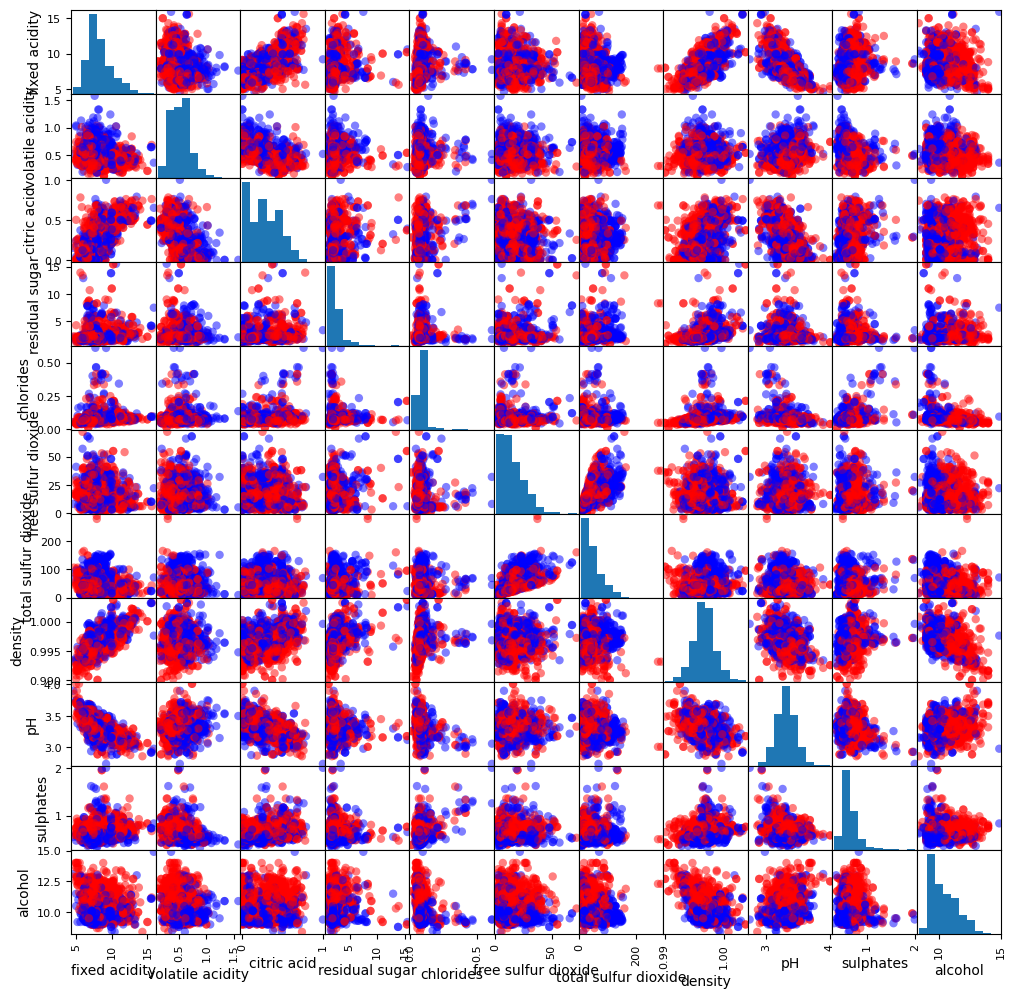

In [5]:
# Figure 4.12

# Creating Labels and Features
y_wine = wine['quality']
X_wine = wine.drop(columns='quality',inplace=False)

# Figure 4.12
# to get different colors for 'Present' and 'Absent'
ycol_wine = wine['quality'].copy()
ycol_wine.loc[ycol_wine==1] = 'red'
ycol_wine.loc[ycol_wine==0] = 'blue'
pd.plotting.scatter_matrix(X_wine, marker = 'O', figsize = (12,12), color = ycol_wine)
plt.show()

In [6]:
# split the wine data
X_train, X_val, X_test, X_train_std, X_val_std, X_test_std, y_train, y_val, y_test, y_train_std, y_val_std, y_test_std = train_val_test_split(X_wine,y_wine,723)

In [7]:
# Inserting a column of ones to get the intercept
X_train_std.insert(0,"Intercept",np.ones((len(X_train_std),1)),allow_duplicates=False)
X_val_std.insert(0,"Intercept",np.ones((len(X_val_std),1)),allow_duplicates=False)
X_test_std.insert(0,"Intercept",np.ones((len(X_test_std),1)),allow_duplicates=False)

In [8]:
features = ['Intercept', 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
basis = 0
selected_features = []

for i in range(len(features)):
    temp_features = selected_features.copy()
    temp_features.append(features[i])
    
    thetasstep, loglikestep = SGD0(X_train_std[temp_features], y_train_std, 0.01)
    perc = percentcorr(thetasstep, X_test_std[temp_features])
    
    if perc>basis:
        basis = perc
        selected_features.append(features[i])

print("Most important features = ", selected_features[1:len(selected_features)])

Most important features =  ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density']


In [9]:
# Sweeping through the lambda
lmda = np.linspace(0,1,100)
basis = 0
best_lmda = 0
thetalist_l1 = []

for i in range(len(lmda)):
    thetal1, loglikel1 = SGD1(X_train_std, y_train_std, 0.1, lmda[i])
    thetalist_l1.append(thetal1)
    percl1 = percentcorr(thetal1, X_test_std)
    if percl1 > basis:
        basis = percl1
        best_lmda_index = i
        best_lmda = lmda[i]
best_lmda

/var/folders/zl/fxd66b555m5656g3sfpymcbr0000gn/T/ipykernel_21974/112028845.py:40: RuntimeWarning: divide by zero encountered in log
  temp = temp + np.log(h)*(y_train_std.iloc[i]) + (1-y_train_std.iloc[i])*(np.log(1-h))


0.595959595959596

# Results

In [10]:
thetas0, loglike0 = SGD0(X_train_std, y_train_std, 0.1)
thetas2, loglike2 = SGD2(X_train_std, y_train_std, 0.1, 0.001)
theta_step, loglike_step = SGD0(X_train_std[selected_features], y_train_std, 0.01)
thetas1, loglike1 = SGD1(X_train_std, y_train_std, 0.1,0.001)

perc0 = percentcorr(thetas0, X_test_std)
perc1 = percentcorr(thetas1, X_test_std)
perc2 = percentcorr(thetas2, X_test_std)
perc_step = percentcorr(theta_step, X_test_std[selected_features])

/var/folders/zl/fxd66b555m5656g3sfpymcbr0000gn/T/ipykernel_21974/112028845.py:21: RuntimeWarning: divide by zero encountered in log
  temp = temp + np.log(h)*(y_train_std.iloc[i]) + (1-y_train_std.iloc[i])*(np.log(1-h))
/var/folders/zl/fxd66b555m5656g3sfpymcbr0000gn/T/ipykernel_21974/112028845.py:40: RuntimeWarning: divide by zero encountered in log
  temp = temp + np.log(h)*(y_train_std.iloc[i]) + (1-y_train_std.iloc[i])*(np.log(1-h))


In [11]:
df_results = pd.DataFrame()
df_results["No Regularization"] = thetas0
df_results["L1 Regularization"] = thetas1
df_results["L2 Regularization"] = thetas2
df_results["Stepwise"] = theta_step
df_results.loc["Percent Correct", "No Regularization"] = perc0
df_results.loc["Percent Correct", "L1 Regularization"] = perc1
df_results.loc["Percent Correct", "L2 Regularization"] = perc2
df_results.loc["Percent Correct", "Stepwise"] = perc_step

df_results

,No Regularization,L1 Regularization,L2 Regularization,Stepwise
Intercept,-33.450291,-33.264024,-11.115568,-2.846903
fixed acidity,5.387998,5.258547,1.227875,NaN
volatile acidity,-15.276549,-15.195838,-5.468328,-1.946483
citric acid,0.427300,0.357735,-0.345400,NaN
residual sugar,1.756738,1.740038,1.118765,NaN
chlorides,-5.524023,-5.441251,-1.345831,-0.476243
free sulfur dioxide,1.040369,1.027905,0.003146,NaN
total sulfur dioxide,-14.561897,-14.471316,-5.890042,-1.394141
density,-2.714690,-2.616241,-1.174005,-0.720675
pH,2.289103,2.183507,0.294608,NaN


Overall, for this winequality dataset that I got from Kaggle, it seems that the features selected by forward stepwise match those emphasized from the L1 regularization. From the chart above, we can see that the features chosen from stepwise have large coefficients (in terms of the magnitude) for L1 regularization as well.